<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumAlgorithm_Shor_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=3a3d090f1d772c87e9a7a57fda46bbbfbb431d5872ec679e2e9cf84a69a29958
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 99.8 MB/s eta 0:00:00


In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector

from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np

import math, random
from fractions import Fraction
import matplotlib.pyplot as plt

In [45]:
def factorize4(N):
    trial = 0
    while (True):
        trial += 1
        print('trial =', trial)
        a = random.randint(2, N - 1)
        if a not in [2, 7, 8, 11, 13]:
            continue
        ###if

        r, qc = findPeriodByQuantumCircuit(N, a)
        print('\ta =', a, 'r =', r)
        if (r % 2 != 0):
            continue
        ###if

        gcd1 = math.gcd(N, a ** (r // 2) + 1)
        gcd2 = math.gcd(N, a ** (r // 2) - 1)
        print('\tgcd1 =', gcd1, 'gcd2 =', gcd2)
        if (gcd1 == 1 or gcd2 == 1):
            continue
        ##if

        return gcd1, gcd2, qc
    ###while
###def

def findPeriodByQuantumCircuit(N, a):
    phase, qc = qpe_amod15(a)
    frac = Fraction(phase).limit_denominator(15)
    return frac.denominator, qc
###def

def qpe_amod15(a):
    n_count = 3
    qc = QuantumCircuit(4 + n_count, n_count)
    for q in range(n_count):
        qc.h(q)
    ###for

    qc.x(3 + n_count)
    for q in range(n_count):
        qc.append(c_amod15(a, 2 ** q), [q] + [i + n_count for i in range(4)])
    ###for
    qc.append(qft_dagger(n_count), range(n_count))
    qc.measure(range(n_count), range(n_count))

    backend = Aer.get_backend('qasm_simulator')
    # Transpile the circuit to the basis gates supported by the simulator
    transpiled_qc = transpile(qc, backend)

    result = backend.run(transpiled_qc, shots=1, memory=True).result()

    readings = result.get_memory()
    phase = int(readings[0], 2) / (2 ** n_count)
    return phase, qc
###def

def c_amod15(a, power):
    if a not in [2, 7, 8, 11, 13]:
        raise ValueError("'a' must be in [2, 7, 8, 11, 13]")
    ###if

    U = QuantumCircuit(4)
    for iteration in range(power):
        if a in [2, 13]:
            U.swap(0, 1)
            U.swap(1, 2)
            U.swap(2, 3)
        ###if

        if a in [7, 8]:
            U.swap(2, 3)
            U.swap(1, 2)
            U.swap(0, 1)
        ###if

        if a == 11:
            U.swap(1, 3)
            U.swap(0, 2)
        ###if
        if a in [7, 11, 13]:
            for q in range(4):
                U.x(q)
            ###for
        ###if
    U = U.to_gate()
    U.name = " %i^%i mod 15" % (a, power)
    c_U = U.control()
    return c_U
###def

def qft_dagger(n):
    qc = QuantumCircuit(n)
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    ###for
    for j in range(n):
        for m in range(j):
            #qc.cu1(-np.pi / float(2**(j-m)), m, j)
            qc.cp(-np.pi / float(2**(j-m)), m, j)
        ###for
        qc.h(j)
    ###for
    qc.name = " QFT† (I-QFT)"
    return qc
###def

In [46]:
def main():
    N = 3 * 5
    p, q, qc = factorize4(N)
    print(N, '=', p, '*', q)
    qc.draw("mpl")
###def

In [47]:
main()

trial = 1
trial = 2
	a = 13 r = 1
trial = 3
trial = 4
trial = 5
trial = 6
trial = 7
	a = 11 r = 1
trial = 8
trial = 9
	a = 11 r = 2
	gcd1 = 3 gcd2 = 5
15 = 3 * 5


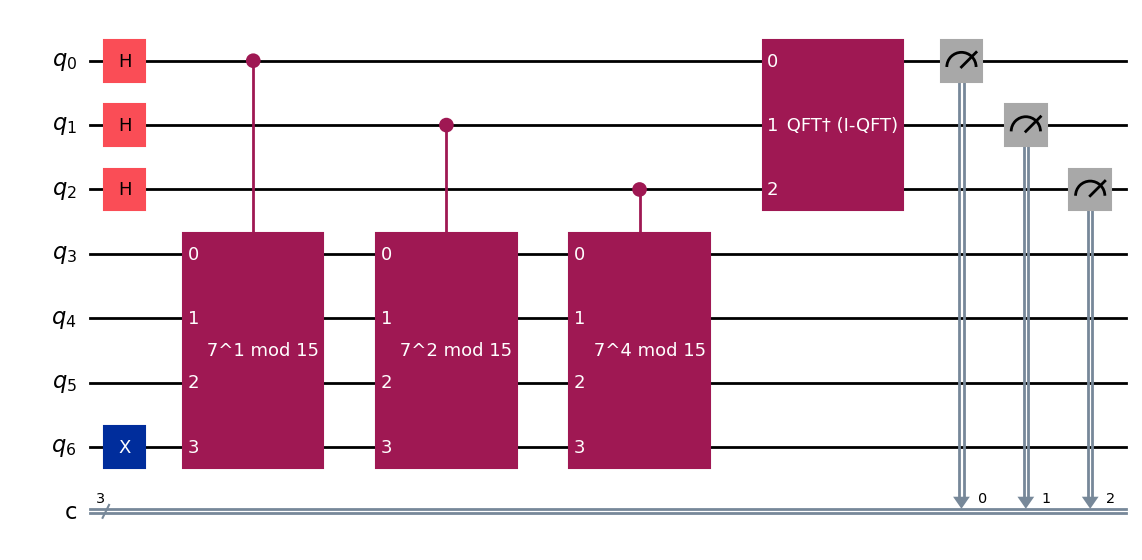

In [51]:
# QPE 회로 그리기
a = 7
phase, qc = qpe_amod15(a)
qc.draw("mpl")

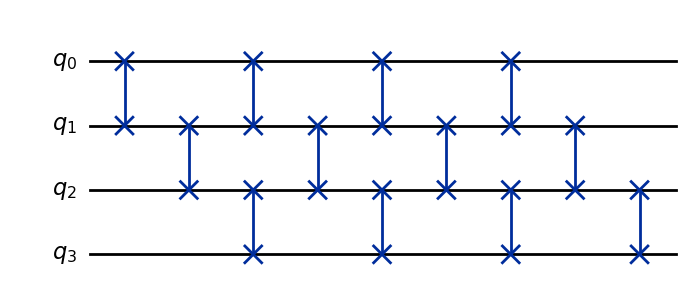

In [52]:
# Modular Power 회로 그리기
a = 2
power = 4
U = QuantumCircuit(4)
for iteration in range(power):
    if a in [2, 13]:
        U.swap(0, 1)
        U.swap(1, 2)
        U.swap(2, 3)
    ###if
    if a in [7, 8]:
        U.swap(2, 3)
        U.swap(1, 2)
        U.swap(0, 1)
    ###if
    if a == 11:
        U.swap(1, 3)
        U.swap(0, 2)
    ###if
    if a in [7, 11, 13]:
        for q in range(4):
            U.x(q)
        ###for
    ###if
###for

U.draw("mpl")

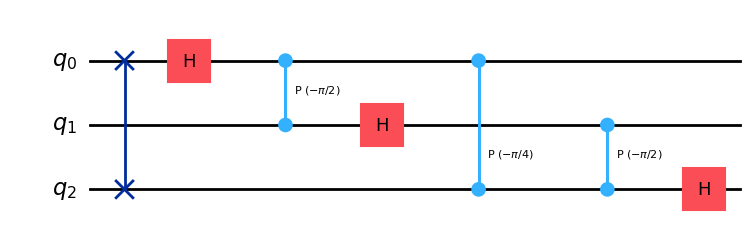

In [53]:
# I-QFT 회로 그리기
qc = qft_dagger(3)
qc.draw("mpl")